In [1]:
%matplotlib inline

In [9]:
# Beat tracking example
from __future__ import print_function
import librosa
import matplotlib.pyplot as plt
import numpy as np

from os import listdir
from os.path import isfile, join

In [10]:
path = "data/"

def is_mp3(path):
    return path.endswith(".mp3")

artists = [f for f in listdir(path) if not isfile(join(path, f))]
songs = [list(map(lambda p: path + a + "/" + p, filter(is_mp3, listdir(path + "/" + a)))) for a in artists ]

In [20]:
def process(filename):
    y, sr = librosa.load(filename)
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    np.save(filename.replace("data", "spect"), S)
    
    return S

def draw(spectrogram, title = 'Mel spectrogram'):
    from pylab import rcParams
    rcParams['figure.figsize'] = 10,2

    fig = librosa.display.specshow(librosa.logamplitude(spectrogram,ref_power=np.max), y_axis='mel', fmax=100, x_axis='time')

#     plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()

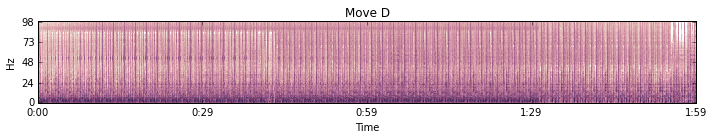

In [23]:
draw(process("data/moved.mp3"), "Move D")

In [13]:
s = [[process(s) for s in a] for a in songs]

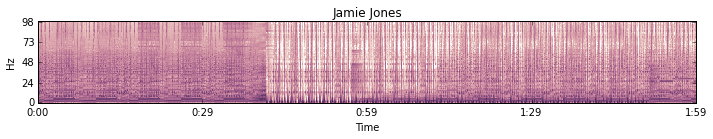

In [14]:
draw(s[0][1], "Jamie Jones")


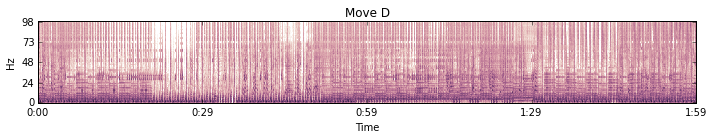

In [15]:
draw(s[1][4], "Move D")

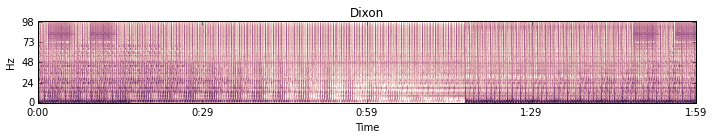

In [16]:
draw(s[2][0], "Dixon")